## 1. Import Libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_circles, make_moons, make_swiss_roll, load_digits
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import warnings
from IPython.display import display

warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
np.random.seed(42)

## 2. Load and Prepare Datasets

In [15]:
# Dataset 1: Circles (Non-linear, 2 classes)
X_circles, y_circles = make_circles(n_samples=1000, noise=0.05, factor=0.5, random_state=42)

# Dataset 2: Moons (Non-linear, 2 classes)
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

# Dataset 3: Swiss Roll (3D manifold)
X_swiss, y_swiss = make_swiss_roll(n_samples=1500, noise=0.1, random_state=42)

# Dataset 4: Digits (Real-world, 10 classes)
digits = load_digits()
X_digits, y_digits = digits.data, digits.target

# Standardize all datasets
scaler = StandardScaler()
X_circles = scaler.fit_transform(X_circles)
X_moons = scaler.fit_transform(X_moons)
X_swiss = scaler.fit_transform(X_swiss)
X_digits = scaler.fit_transform(X_digits)

print("Datasets loaded:")
print(f"1. Circles: {X_circles.shape}")
print(f"2. Moons: {X_moons.shape}")
print(f"3. Swiss Roll: {X_swiss.shape}")
print(f"4. Digits: {X_digits.shape}")

Datasets loaded:
1. Circles: (1000, 2)
2. Moons: (1000, 2)
3. Swiss Roll: (1500, 3)
4. Digits: (1797, 64)


## 3. Helper Functions

In [16]:
def apply_dimensionality_reduction(X, y, method='pca', **kwargs):
    """
    Apply dimensionality reduction method
    
    Parameters:
    -----------
    X : array-like, shape (n_samples, n_features)
    y : array-like, shape (n_samples,)
    method : str, 'pca', 'kernel_pca', or 'tsne'
    **kwargs : additional parameters for the method
    
    Returns:
    --------
    X_reduced : array-like, shape (n_samples, 2)
    """
    if method == 'pca':
        model = PCA(n_components=2, random_state=42)
    elif method == 'kernel_pca':
        model = KernelPCA(n_components=2, kernel='rbf', gamma=kwargs.get('gamma', None), random_state=42)
    elif method == 'tsne':
        model = TSNE(n_components=2, random_state=kwargs.get('random_state', 42), 
                     perplexity=kwargs.get('perplexity', 30), max_iter=1000)
    else:
        raise ValueError(f"Unknown method: {method}")
    
    X_reduced = model.fit_transform(X)
    return X_reduced

def plot_reduction(ax, X_reduced, y, title, cmap='tab10'):
    """
    Plot dimensionality reduction result
    """
    scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], 
                        c=y, cmap=cmap, s=20, alpha=0.7, edgecolors='k', linewidth=0.5)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.grid(True, alpha=0.3)
    return scatter

## 4. Visualize Original Datasets

Before applying dimensionality reduction, let's visualize the raw datasets

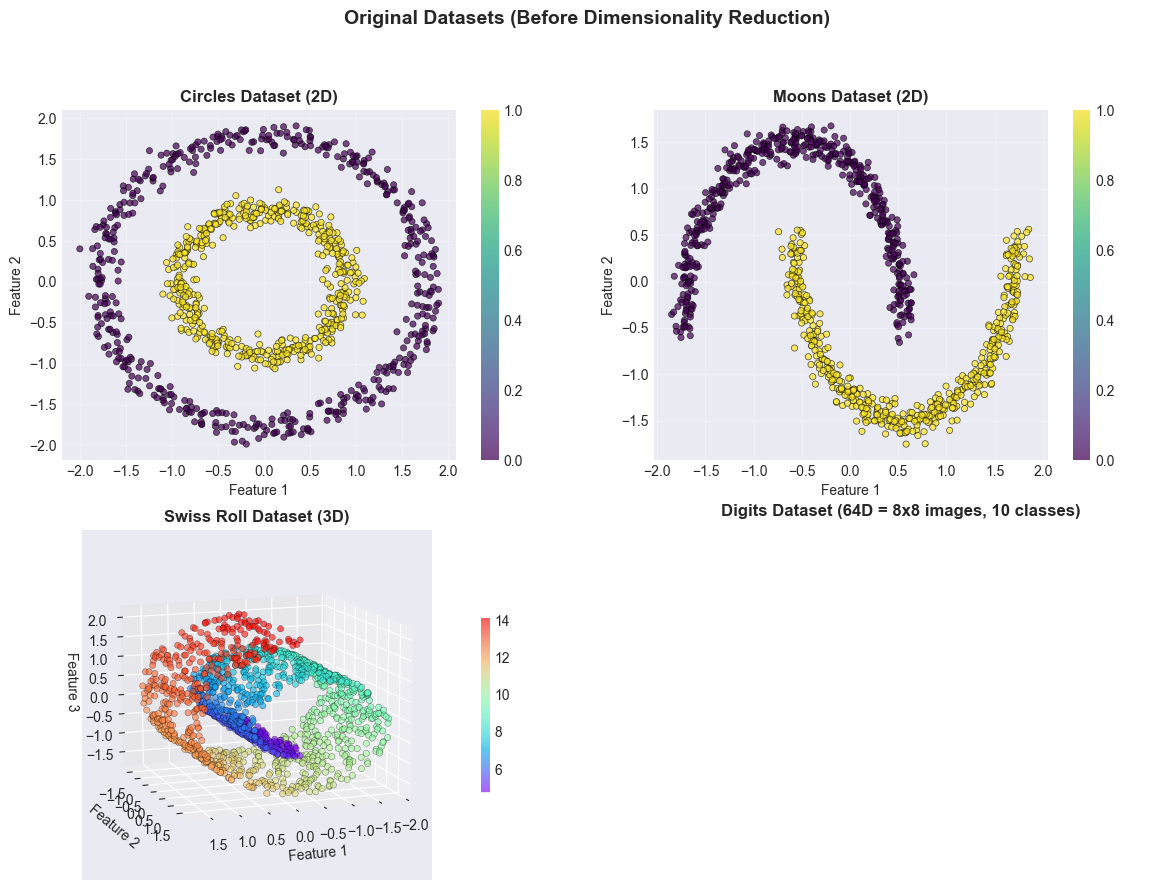

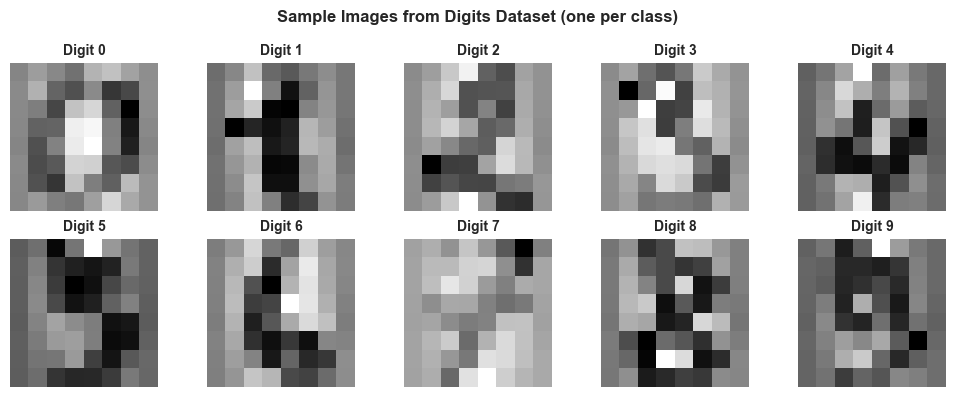

<Figure size 640x480 with 0 Axes>

Dataset Characteristics:
1. Circles:    (1000, 2) - Non-linear, 2 classes
2. Moons:      (1000, 2) - Non-linear, 2 classes
3. Swiss Roll: (1500, 3) - 3D manifold, continuous
4. Digits:     (1797, 64) - High-dimensional, 10 classes


In [17]:
# Visualize original datasets
fig = plt.figure(figsize=(14, 10))
fig.suptitle('Original Datasets (Before Dimensionality Reduction)', 
             fontsize=14, fontweight='bold')

# Dataset 1: Circles (2D)
ax = plt.subplot(2, 2, 1)
scatter = ax.scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, cmap='viridis', 
                    s=20, alpha=0.7, edgecolors='k', linewidth=0.5)
ax.set_title('Circles Dataset (2D)', fontsize=12, fontweight='bold')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax)

# Dataset 2: Moons (2D)
ax = plt.subplot(2, 2, 2)
scatter = ax.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='viridis', 
                    s=20, alpha=0.7, edgecolors='k', linewidth=0.5)
ax.set_title('Moons Dataset (2D)', fontsize=12, fontweight='bold')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax)

# Dataset 3: Swiss Roll (3D - TRUE 3D visualization)
ax = plt.subplot(2, 2, 3, projection='3d')
scatter = ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], 
                    c=y_swiss, cmap='rainbow', s=20, alpha=0.6, edgecolors='k', linewidth=0.3)
ax.set_title('Swiss Roll Dataset (3D)', fontsize=12, fontweight='bold')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.view_init(elev=12, azim=70)
plt.colorbar(scatter, ax=ax, shrink=0.5, pad=0.1)

# Dataset 4: Digits (64D - show sample images in a grid)
ax = plt.subplot(2, 2, 4)
ax.axis('off')
ax.set_title('Digits Dataset (64D = 8x8 images, 10 classes)', fontsize=12, fontweight='bold', pad=10)

# Create a 2x5 grid showing one sample per digit class
fig_grid = plt.figure(figsize=(10, 4))
for digit in range(10):
    # Get first sample of this digit
    digit_idx = np.where(y_digits == digit)[0][0]
    
    # Create subplot in 2x5 grid
    ax_digit = fig_grid.add_subplot(2, 5, digit + 1)
    ax_digit.imshow(X_digits[digit_idx].reshape(8, 8), cmap='gray_r', interpolation='nearest')
    ax_digit.set_title(f'Digit {digit}', fontsize=10, fontweight='bold')
    ax_digit.axis('off')

fig_grid.suptitle('Sample Images from Digits Dataset (one per class)', fontsize=12, fontweight='bold')
fig_grid.tight_layout()
plt.show()

plt.figure(fig.number)
plt.tight_layout()
plt.show()

print("Dataset Characteristics:")
print("="*50)
print(f"1. Circles:    {X_circles.shape} - Non-linear, 2 classes")
print(f"2. Moons:      {X_moons.shape} - Non-linear, 2 classes")
print(f"3. Swiss Roll: {X_swiss.shape} - 3D manifold, continuous")
print(f"4. Digits:     {X_digits.shape} - High-dimensional, 10 classes")

## 5. Experiment 1: Compare All Methods on Each Dataset

Apply **3 models** (PCA, Kernel PCA, t-SNE) to each dataset separately

### 5.1 Circles Dataset

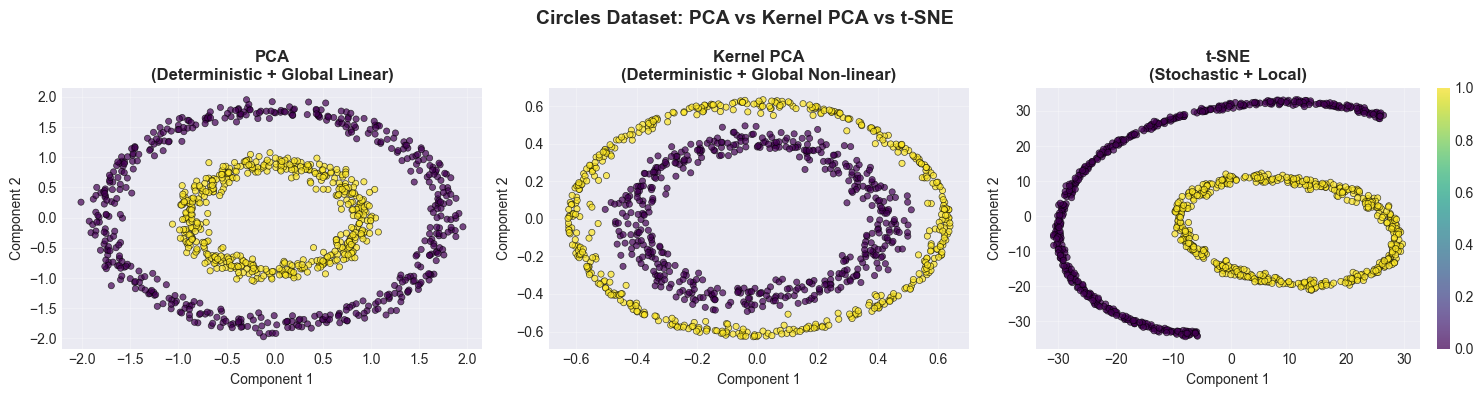

In [18]:
# Circles Dataset
methods = ['pca', 'kernel_pca', 'tsne']
method_names = ['PCA\n(Deterministic + Global Linear)', 
                'Kernel PCA\n(Deterministic + Global Non-linear)', 
                't-SNE\n(Stochastic + Local)']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Circles Dataset: PCA vs Kernel PCA vs t-SNE', 
             fontsize=14, fontweight='bold')

for j, (method, method_name) in enumerate(zip(methods, method_names)):
    if method == 'kernel_pca':
        X_reduced = apply_dimensionality_reduction(X_circles, y_circles, method, gamma=1.0)
    else:
        X_reduced = apply_dimensionality_reduction(X_circles, y_circles, method)
    
    scatter = plot_reduction(axes[j], X_reduced, y_circles, method_name, cmap='viridis')
    
    if j == 2:
        plt.colorbar(scatter, ax=axes[j], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

### 5.2 Moons Dataset

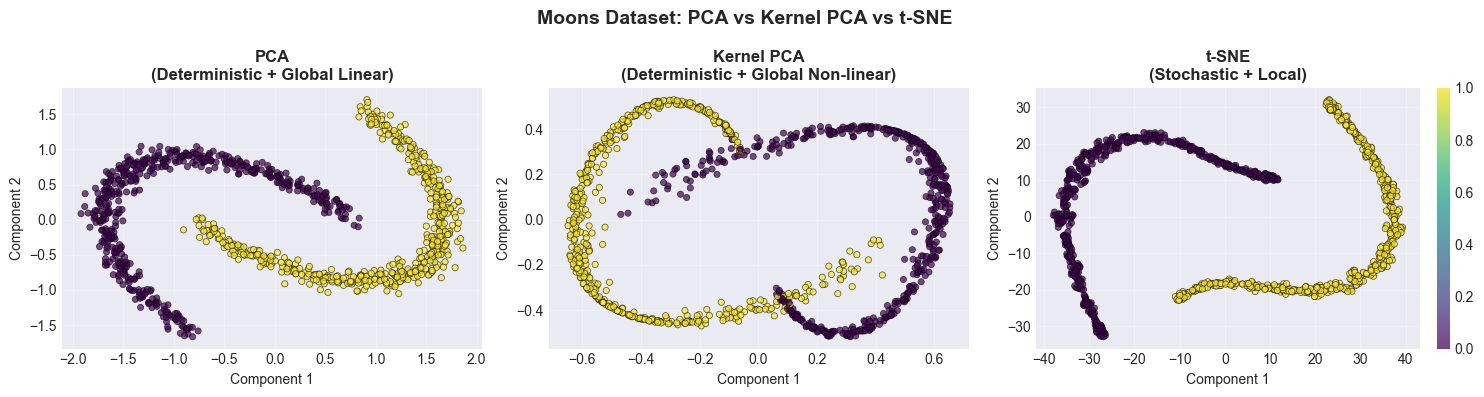

In [19]:
# Moons Dataset
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Moons Dataset: PCA vs Kernel PCA vs t-SNE', 
             fontsize=14, fontweight='bold')

for j, (method, method_name) in enumerate(zip(methods, method_names)):
    
    if method == 'kernel_pca':
        X_reduced = apply_dimensionality_reduction(X_moons, y_moons, method, gamma=1.0)
    else:
        X_reduced = apply_dimensionality_reduction(X_moons, y_moons, method)
    
    scatter = plot_reduction(axes[j], X_reduced, y_moons, method_name, cmap='viridis')
    
    if j == 2:
        plt.colorbar(scatter, ax=axes[j], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

### 5.3 Swiss Roll Dataset

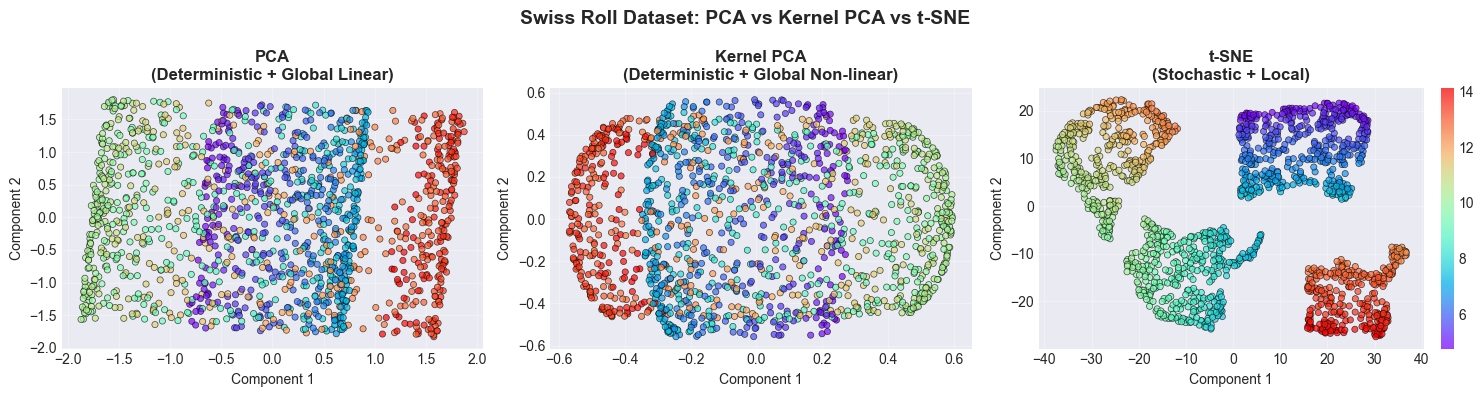

In [20]:
# Swiss Roll Dataset
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Swiss Roll Dataset: PCA vs Kernel PCA vs t-SNE', 
             fontsize=14, fontweight='bold')

for j, (method, method_name) in enumerate(zip(methods, method_names)):
    if method == 'kernel_pca':
        X_reduced = apply_dimensionality_reduction(X_swiss, y_swiss, method, gamma=0.1)
    elif method == 'tsne':
        X_reduced = apply_dimensionality_reduction(X_swiss, y_swiss, method, perplexity=50)
    else:
        X_reduced = apply_dimensionality_reduction(X_swiss, y_swiss, method)
    
    scatter = plot_reduction(axes[j], X_reduced, y_swiss, method_name, cmap='rainbow')
    
    if j == 2:
        plt.colorbar(scatter, ax=axes[j], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

### 5.4 Digits Dataset

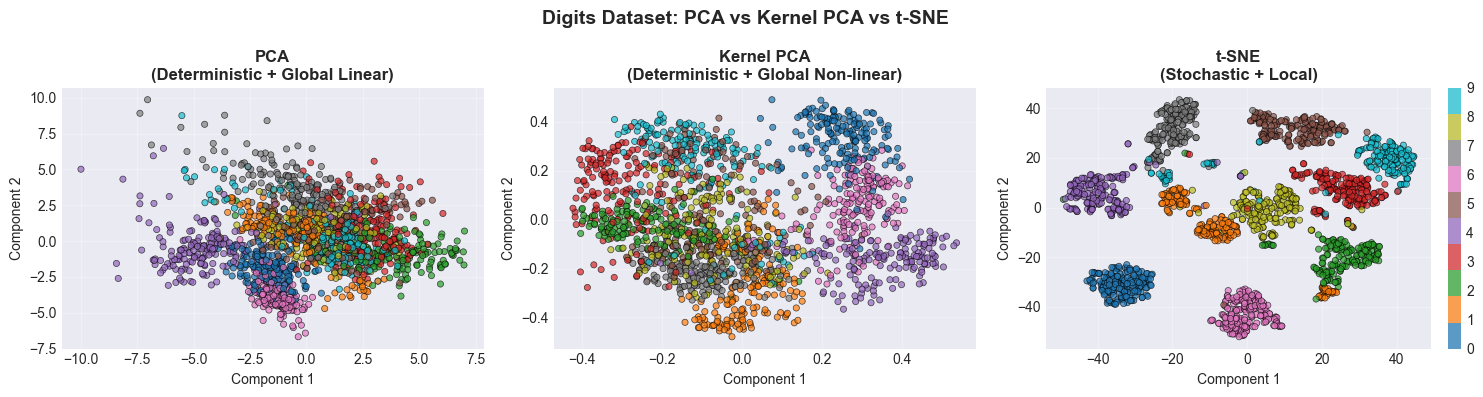

In [21]:
# Digits Dataset
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Digits Dataset: PCA vs Kernel PCA vs t-SNE', 
             fontsize=14, fontweight='bold')

for j, (method, method_name) in enumerate(zip(methods, method_names)):
    if method == 'kernel_pca':
        X_reduced = apply_dimensionality_reduction(X_digits, y_digits, method, gamma=0.01)
    else:
        X_reduced = apply_dimensionality_reduction(X_digits, y_digits, method)
    
    scatter = plot_reduction(axes[j], X_reduced, y_digits, method_name, cmap='tab10')
    
    if j == 2:
        plt.colorbar(scatter, ax=axes[j], fraction=0.046, pad=0.04, ticks=range(10))

plt.tight_layout()
plt.show()


## 6. Experiment 2: Demonstrate Stochastic Nature of t-SNE

Run t-SNE **multiple times** with different initialization to show stochastic behavior.

**Note**: t-SNE's randomness comes from random initialization. Different `random_state` values lead to different initializations and potentially different local minima.

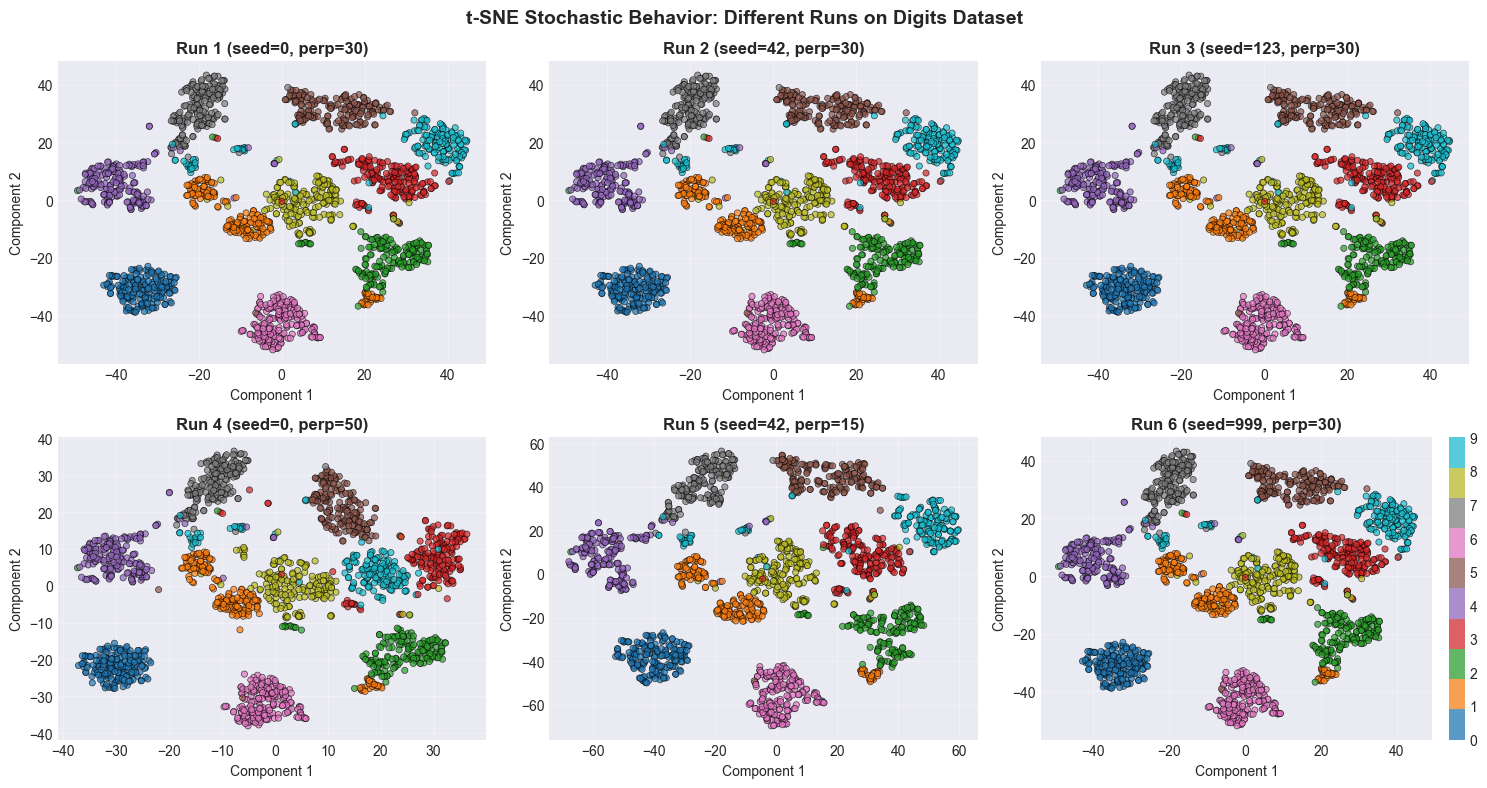

In [22]:
# Demonstrate stochastic nature with different parameters and random states
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('t-SNE Stochastic Behavior: Different Runs on Digits Dataset', 
             fontsize=14, fontweight='bold')

# Different configurations to show variation
configs = [
    {'random_state': 0, 'perplexity': 30, 'label': 'Run 1 (seed=0, perp=30)'},
    {'random_state': 42, 'perplexity': 30, 'label': 'Run 2 (seed=42, perp=30)'},
    {'random_state': 123, 'perplexity': 30, 'label': 'Run 3 (seed=123, perp=30)'},
    {'random_state': 0, 'perplexity': 50, 'label': 'Run 4 (seed=0, perp=50)'},
    {'random_state': 42, 'perplexity': 15, 'label': 'Run 5 (seed=42, perp=15)'},
    {'random_state': 999, 'perplexity': 30, 'label': 'Run 6 (seed=999, perp=30)'},
]

for idx, config in enumerate(configs):
    i, j = idx // 3, idx % 3
    ax = axes[i, j]
    
    X_tsne = apply_dimensionality_reduction(
        X_digits, y_digits, 'tsne', 
        random_state=config['random_state'],
        perplexity=config['perplexity']
    )
    
    scatter = plot_reduction(ax, X_tsne, y_digits, config['label'], cmap='tab10')
    
    # Add colorbar to last plot
    if idx == 5:
        plt.colorbar(scatter, ax=ax, fraction=0.046, pad=0.04, ticks=range(10))

plt.tight_layout()
plt.show()

## 7. Experiment 3: Demonstrate Deterministic Nature of Kernel PCA

Run Kernel PCA **3 times on 4 datasets** to prove deterministic behavior

### 7.1 Visual Comparison: Kernel PCA with Different random_state

Even with different `random_state` values, Kernel PCA produces identical results

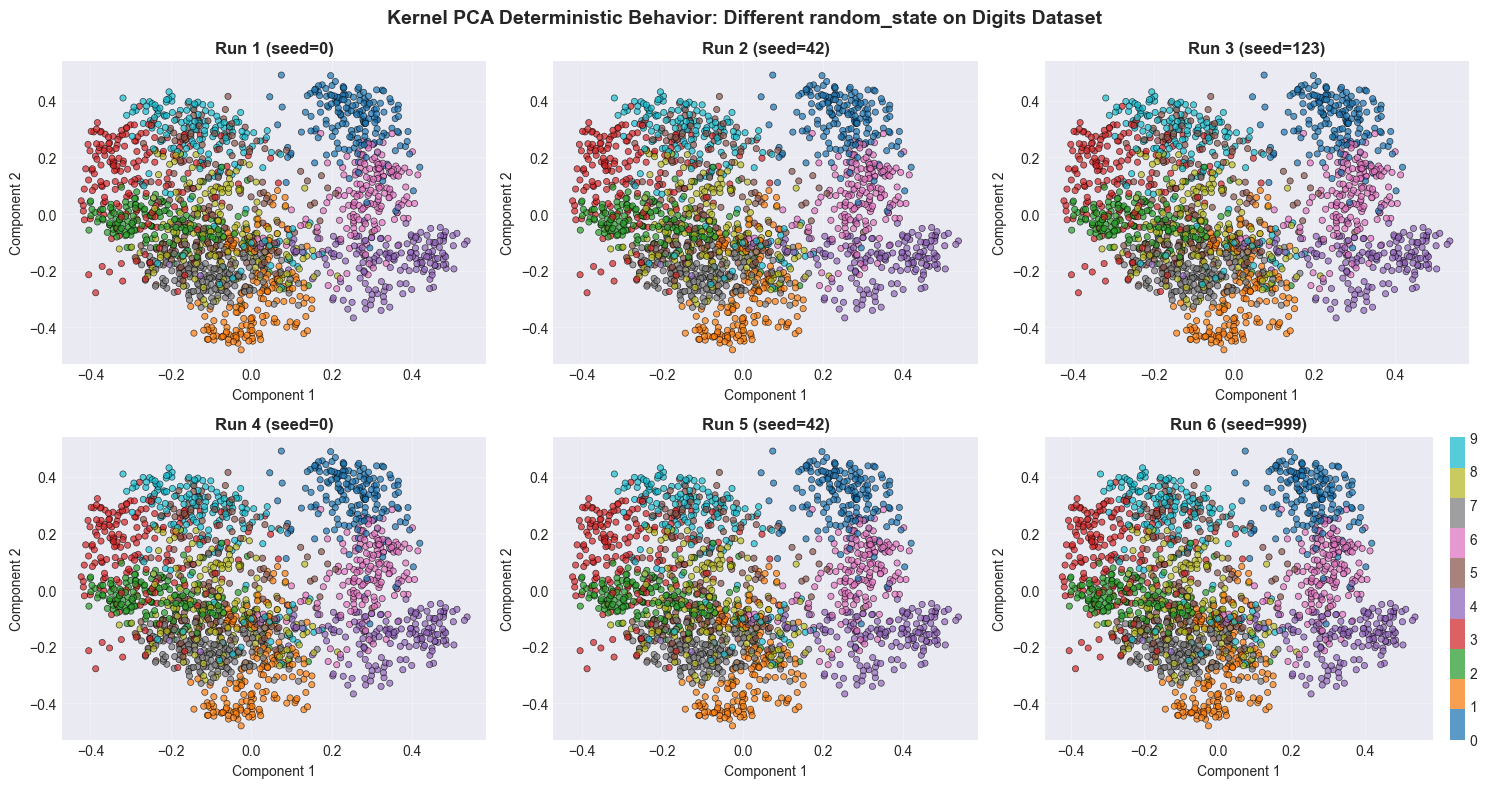

In [23]:
# Helper function for Kernel PCA with explicit random_state
def apply_kernel_pca_with_random_state(X, gamma, random_state):
    """Apply Kernel PCA with specific eigen_solver and random_state"""
    model = KernelPCA(n_components=2, kernel='rbf', gamma=gamma, 
                      eigen_solver='randomized', random_state=random_state)
    return model.fit_transform(X)

# Demonstrate that Kernel PCA is deterministic even with different random_state
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Kernel PCA Deterministic Behavior: Different random_state on Digits Dataset', 
             fontsize=14, fontweight='bold')

# Different random_state values (similar to t-SNE experiment)
random_states = [0, 42, 123, 0, 42, 999]
labels = [
    'Run 1 (seed=0)', 'Run 2 (seed=42)', 'Run 3 (seed=123)',
    'Run 4 (seed=0)', 'Run 5 (seed=42)', 'Run 6 (seed=999)'
]

# Store results to calculate differences
kpca_results = []

for idx, (rs, label) in enumerate(zip(random_states, labels)):
    i, j = idx // 3, idx % 3
    ax = axes[i, j]
    
    X_kpca = apply_kernel_pca_with_random_state(X_digits, gamma=0.01, random_state=rs)
    kpca_results.append(X_kpca)
    
    scatter = plot_reduction(ax, X_kpca, y_digits, label, cmap='tab10')
    
    # Add colorbar to last plot
    if idx == 5:
        plt.colorbar(scatter, ax=ax, fraction=0.046, pad=0.04, ticks=range(10))

plt.tight_layout()
plt.show()


### 7.2 Quantitative Analysis: Maximum Differences Across All Datasets

In [24]:
# Prepare test datasets
test_datasets = [
    ('Circles', X_circles, y_circles, 1.0),
    ('Moons', X_moons, y_moons, 1.0),
    ('Swiss Roll', X_swiss, y_swiss, 0.1),
    ('Digits', X_digits, y_digits, 0.01)
]

# Store results for comprehensive table
results_data = []

for dataset_name, X, y, gamma in test_datasets:
    # Run Kernel PCA 3 times with DIFFERENT random_state
    kpca_runs = []
    random_states = [0, 42, 123]
    
    for rs in random_states:
        X_kpca = apply_kernel_pca_with_random_state(X, gamma=gamma, random_state=rs)
        kpca_runs.append(X_kpca)
    
    # Calculate maximum absolute difference between runs with DIFFERENT random_state
    max_diff_0_42 = np.max(np.abs(kpca_runs[0] - kpca_runs[1]))
    max_diff_42_123 = np.max(np.abs(kpca_runs[1] - kpca_runs[2]))
    max_diff_0_123 = np.max(np.abs(kpca_runs[0] - kpca_runs[2]))
    
    # Store for table
    results_data.append({
        'Dataset': dataset_name,
        'Gamma (γ)': gamma,
        'seed=0 Point[0]': f"({kpca_runs[0][0, 0]:.6f}, {kpca_runs[0][0, 1]:.6f})",
        'seed=42 Point[0]': f"({kpca_runs[1][0, 0]:.6f}, {kpca_runs[1][0, 1]:.6f})",
        'seed=123 Point[0]': f"({kpca_runs[2][0, 0]:.6f}, {kpca_runs[2][0, 1]:.6f})",
        'Max Diff (0 vs 42)': f"{max_diff_0_42:.2e}",
        'Max Diff (42 vs 123)': f"{max_diff_42_123:.2e}",
        'Max Diff (0 vs 123)': f"{max_diff_0_123:.2e}"
    })

# Create and display summary table
df_deterministic = pd.DataFrame(results_data)

# Display styled table
display(df_deterministic)

Dataset  Gamma (γ)         seed=0 Point[0]        seed=42 Point[0]  \
0     Circles       1.00   (-0.589161, 0.156638)   (-0.589161, 0.156638)   
1       Moons       1.00   (0.290171, -0.248880)   (0.290171, -0.248880)   
2  Swiss Roll       0.10  (-0.081843, -0.002391)  (-0.081843, -0.002391)   
3      Digits       0.01    (0.240867, 0.371786)    (0.240867, 0.371786)   

        seed=123 Point[0] Max Diff (0 vs 42) Max Diff (42 vs 123)  \
0   (-0.589161, 0.156638)           8.89e-13             8.05e-13   
1   (0.290171, -0.248880)           1.61e-15             6.83e-15   
2  (-0.081843, -0.002391)           3.11e-15             3.61e-15   
3    (0.240867, 0.371786)           2.27e-10             1.23e-10   

  Max Diff (0 vs 123)  
0            1.15e-13  
1            5.50e-15  
2            1.04e-15  
3            1.14e-10

## 8. Experiment 4: Local vs Global Structure Preservation

Demonstrate how t-SNE preserves **local neighborhoods** better than Kernel PCA

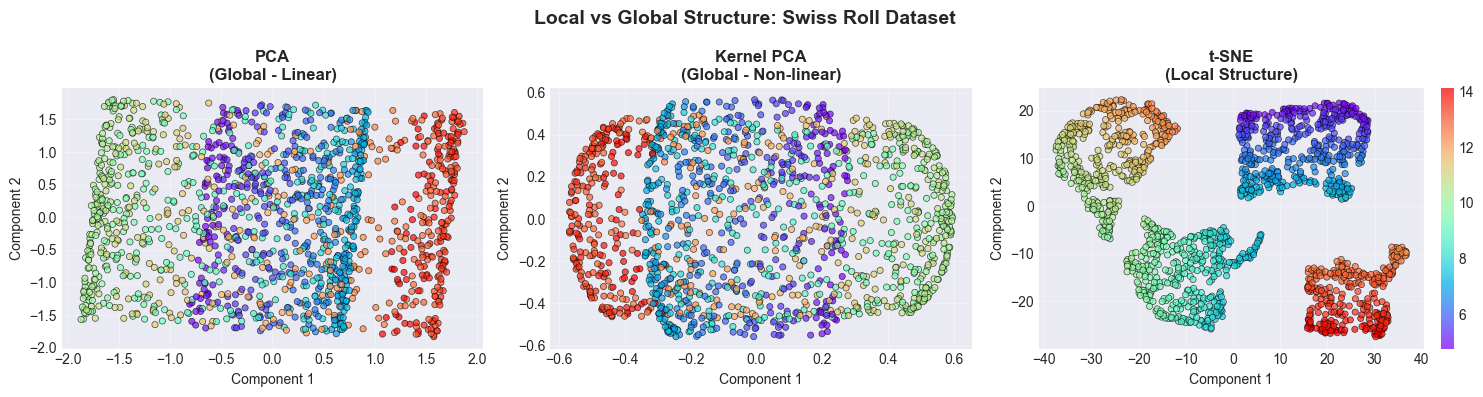

In [25]:
# Use Swiss Roll for clear demonstration
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Local vs Global Structure: Swiss Roll Dataset', 
             fontsize=14, fontweight='bold')

# PCA
X_pca = apply_dimensionality_reduction(X_swiss, y_swiss, 'pca')
plot_reduction(axes[0], X_pca, y_swiss, 
              'PCA\n(Global - Linear)', cmap='rainbow')

# Kernel PCA
X_kpca = apply_dimensionality_reduction(X_swiss, y_swiss, 'kernel_pca', gamma=0.1)
plot_reduction(axes[1], X_kpca, y_swiss, 
              'Kernel PCA\n(Global - Non-linear)', cmap='rainbow')

# t-SNE
X_tsne = apply_dimensionality_reduction(X_swiss, y_swiss, 'tsne', perplexity=50)
scatter = plot_reduction(axes[2], X_tsne, y_swiss, 
                        't-SNE\n(Local Structure)', cmap='rainbow')
plt.colorbar(scatter, ax=axes[2], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()